# Import Modules 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

In [2]:
filepath=("Dataset/iris.csv")

In [3]:
df=pd.read_csv(filepath)

In [4]:
df.columns=["sepal_length","sepal_width","petal_length","petal_width","target"]

In [5]:
df.target.replace({"Iris-setosa":"setosa","Iris-versicolor":"versicolor","Iris-virginica":"virginica"},inplace=True)

In [6]:
df.target.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [8]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width     target
0             4.9          3.0           1.4          0.2     setosa
1             4.7          3.2           1.3          0.2     setosa
2             4.6          3.1           1.5          0.2     setosa
3             5.0          3.6           1.4          0.2     setosa
4             5.4          3.9           1.7          0.4     setosa
..            ...          ...           ...          ...        ...
144           6.7          3.0           5.2          2.3  virginica
145           6.3          2.5           5.0          1.9  virginica
146           6.5          3.0           5.2          2.0  virginica
147           6.2          3.4           5.4          2.3  virginica
148           5.9          3.0           5.1          1.8  virginica

[149 rows x 5 columns]>

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df['target'].value_counts()

versicolor    50
virginica     50
setosa        49
Name: target, dtype: int64

# Preprocessing the dataset

In [11]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

# Exploratory data analysis

<AxesSubplot:>

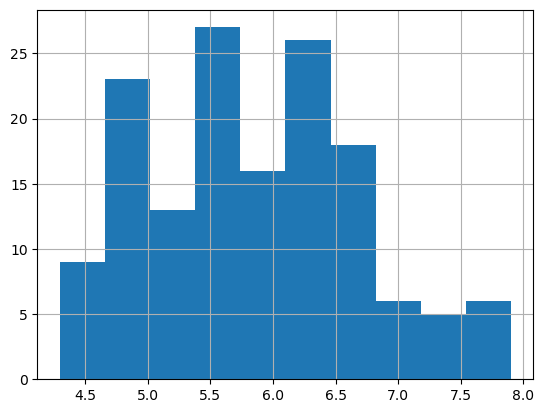

In [12]:
df['sepal_length'].hist()

<AxesSubplot:>

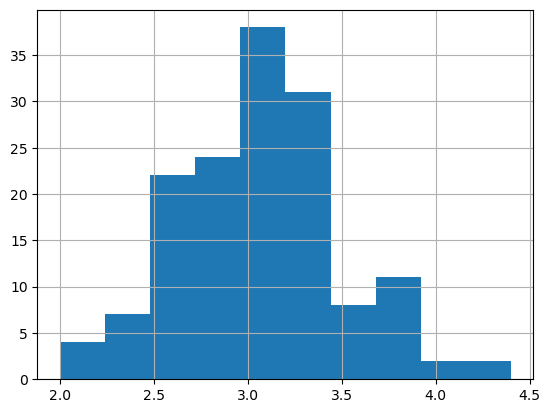

In [13]:
df['sepal_width'].hist()

<AxesSubplot:>

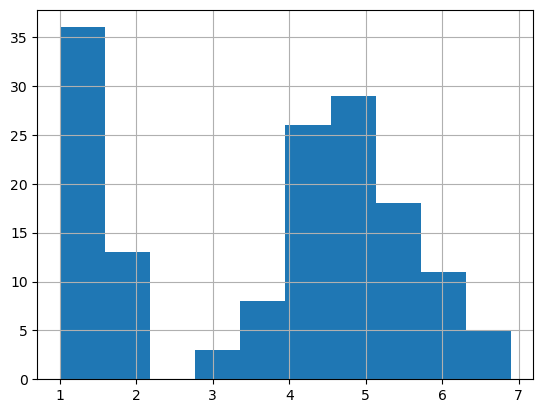

In [14]:
df['petal_length'].hist()

<AxesSubplot:>

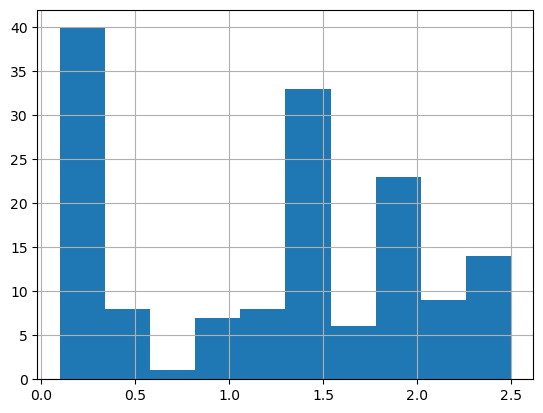

In [15]:
df['petal_width'].hist()

In [16]:
#Scatterplots

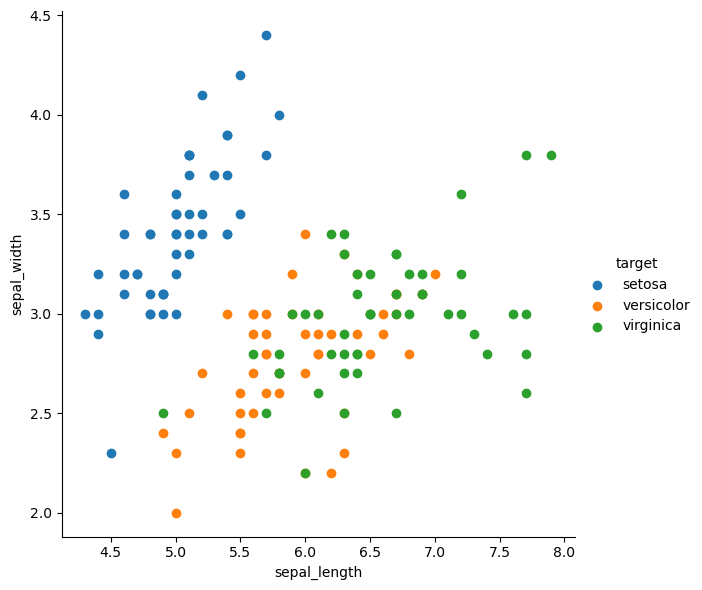

In [21]:
sns.FacetGrid(df,hue='target',height=6).map(plt.scatter,"sepal_length","sepal_width").add_legend()

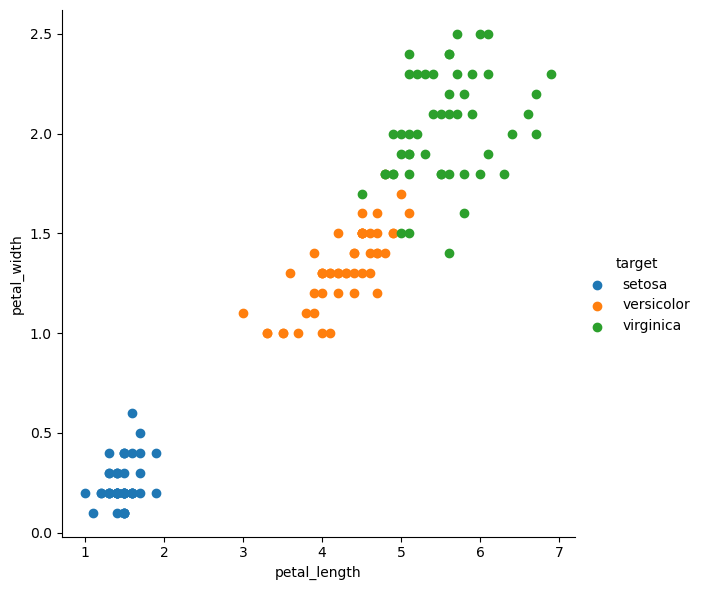

In [23]:
sns.FacetGrid(df,hue='target',height=6).map(plt.scatter,"petal_length","petal_width").add_legend()

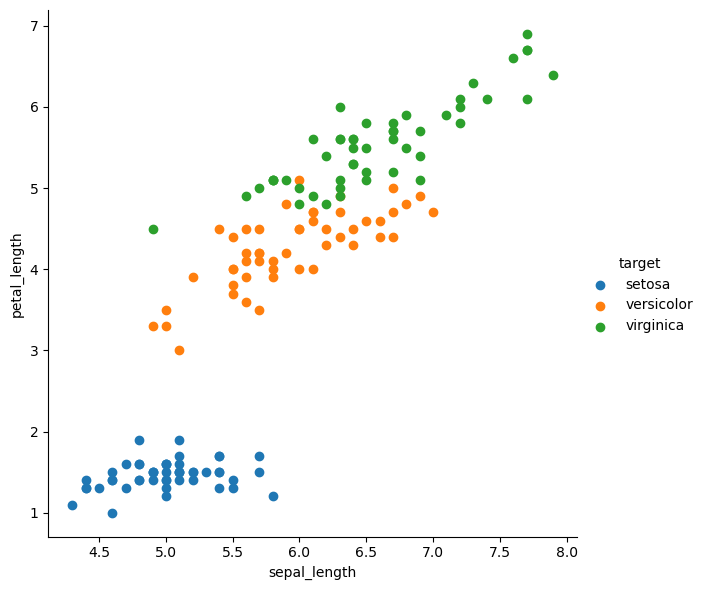

In [24]:
sns.FacetGrid(df,hue='target',height=6).map(plt.scatter,"sepal_length","petal_length").add_legend()

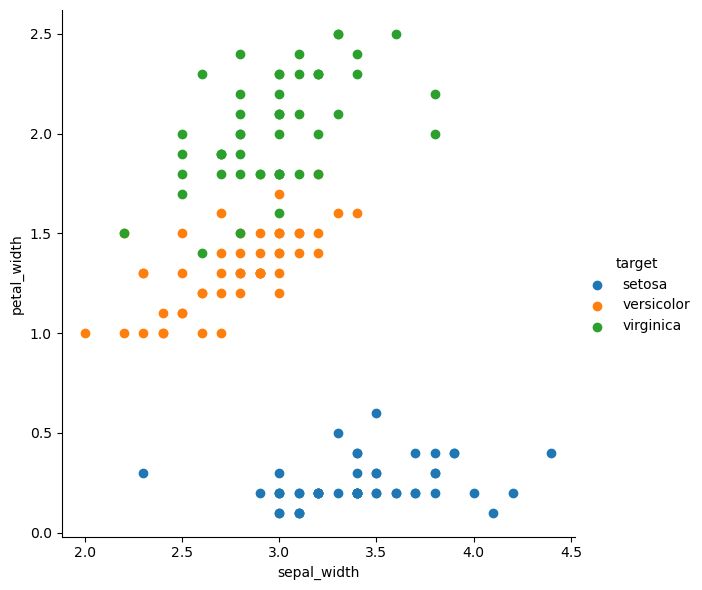

In [25]:
sns.FacetGrid(df,hue='target',height=6).map(plt.scatter,"sepal_width","petal_width").add_legend()

# Coorelation Matrix

In [26]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


<AxesSubplot:>

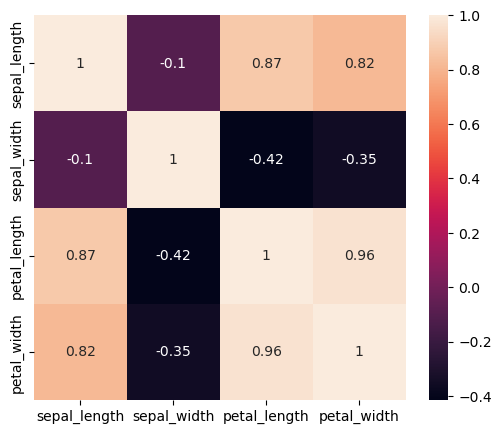

In [27]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True,ax=ax)

# Label Encoder

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
df['target'] = le.fit_transform(df['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


# Model Tarining

In [30]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['target'])
Y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [33]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [34]:
# model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
